# Additional Lab-11
Reham Abuarqoub 

9062922

## Import libraries

In [10]:
# Uncomment if not already installed
# !pip install torch torchvision matplotlib numpy

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


## Personalize Your Dataset

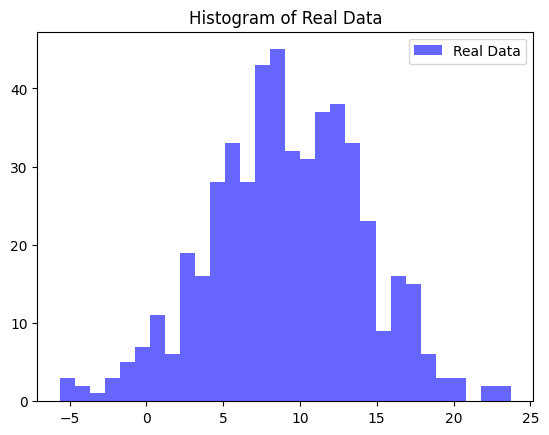

In [11]:
# Personal info
student_id = "9062922"
birth_city = "Amman"
family_name = "Abuarqoub"

# Create unique seed
unique_seed = int(student_id) + sum([ord(c) for c in birth_city]) + sum([ord(c) for c in family_name])
np.random.seed(unique_seed)

# Personalized Gaussian distribution
data_mean = len(family_name)         # 9
data_std = len(birth_city)           # 5
real_data = np.random.normal(loc=data_mean, scale=data_std, size=500)

# Visualize real data
plt.hist(real_data, bins=30, alpha=0.6, color='blue', label='Real Data')
plt.title("Histogram of Real Data")
plt.legend()
plt.show()


#### Talking point #1:
I created a unique personalized dataset. by using my student ID, the country and city of birth, and my last name. I used these to build a personalized Gaussian distribution, so the data my GAN learns from is specific to me.

##  Build Your GAN

In [12]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


#### Talking point #2:
I built a basic Generator that creates fake data from random noise, and a Discriminator that tries to tell if it’s real or fake. 

## Train the GAN

In [13]:
# Initialize models
G = Generator()
D = Discriminator()

# Loss function and optimizers
criterion = nn.BCELoss()
lr = 0.001
G_opt = torch.optim.Adam(G.parameters(), lr=lr)
D_opt = torch.optim.Adam(D.parameters(), lr=lr)

# Real data as tensor
real_data_tensor = torch.tensor(real_data, dtype=torch.float32).view(-1, 1)

# Training loop
for epoch in range(201):
    # === Train Discriminator ===
    D_opt.zero_grad()
    
    # Real
    real_labels = torch.ones(real_data_tensor.size(0), 1)
    real_outputs = D(real_data_tensor)
    d_loss_real = criterion(real_outputs, real_labels)

    # Fake
    noise = torch.randn(real_data_tensor.size(0), 10)
    fake_data = G(noise)
    fake_labels = torch.zeros(real_data_tensor.size(0), 1)
    fake_outputs = D(fake_data.detach())
    d_loss_fake = criterion(fake_outputs, fake_labels)

    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    D_opt.step()

    # === Train Generator ===
    G_opt.zero_grad()
    noise = torch.randn(real_data_tensor.size(0), 10)
    fake_data = G(noise)
    outputs = D(fake_data)
    g_loss = criterion(outputs, real_labels)
    g_loss.backward()
    G_opt.step()

    # Logging every 40 epochs
    if epoch % 40 == 0:
        print(f"Epoch [{epoch}/200]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")


Epoch [0/200]  D Loss: 5.6054  G Loss: 0.7983
Epoch [40/200]  D Loss: 3.4424  G Loss: 0.7141
Epoch [80/200]  D Loss: 1.7258  G Loss: 0.7361
Epoch [120/200]  D Loss: 1.0610  G Loss: 0.7658
Epoch [160/200]  D Loss: 0.9039  G Loss: 0.7937
Epoch [200/200]  D Loss: 0.8353  G Loss: 0.8289


#### Talking point #3:

I trained both models by letting the Discriminator try to spot fake data, and the Generator try to trick it. I used a simple loss function and watched their progress every 40 steps to see how well they were learning.

## Visualize the Results

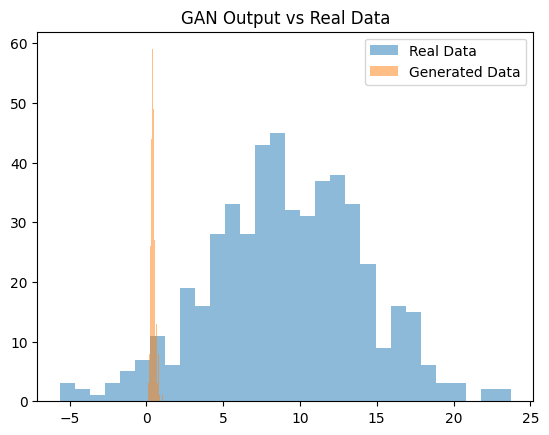

In [14]:
# Generate 500 fake samples
with torch.no_grad():
    test_noise = torch.randn(500, 10)
    generated_data = G(test_noise).numpy()

# Plot histogram
plt.hist(real_data, bins=30, alpha=0.5, label='Real Data')
plt.hist(generated_data, bins=30, alpha=0.5, label='Generated Data')
plt.legend()
plt.title("GAN Output vs Real Data")
plt.show()


#### Talking point #4: 
After training, the Generator created data that was too narrow and centered around zero, while the real data was more spread out. This means the GAN started learning but still needs better tuning to match the real pattern.g

## Conclusion:

This assignment really helped me understand how GANs work. I built a simple one using my personal info, and it was interesting to watch how the Generator and Discriminator learned from each other. Even though the fake data wasn’t perfect, it still showed that the Generator was picking up on the real pattern. 